In [1]:
import sys
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sys.path.append('../')

In [32]:
df_draft = pd.read_csv('../data/clean_nfl_draft.csv')
#df_draft.drop(['Unnamed: 0'],inplace=True,axis=1)

In [19]:
temp_int = df_draft['Tkl'][5139:5169] 
temp_sk = df_draft['Def_Int'][5139:5169]
temp_coll = df_draft['Sk'][5139:5169]

In [20]:
df_draft.loc[5139:5169, 'College/Univ'] = temp_coll

In [21]:
df_draft.loc[5139:5169, 'Sk'] = temp_sk

In [22]:
df_draft.loc[5139:5169, 'Def_Int'] = temp_int

In [23]:
df_draft.loc[5139:5169, 'Tkl'] = 0

In [33]:
df_draft.loc[5169,['Def_Int','Tkl','Sk']] = [0,0,0]

In [36]:
df_draft.loc[5138,'Sk'] = 0

In [37]:
df_draft.to_csv('../data/clean_nfl_draft.csv',index=False)

In [27]:
df_draft.loc[5139:5145]['Sk'] 

5139     8.5
5140    42.5
5141     0.0
5142     2.0
5143     0.0
5144     5.5
5145     0.0
Name: Sk, dtype: object

In [4]:
#Divisao do dataset em posições
positions = set(df_draft['Position Standard'])
Positions = {}
info = list()
for pos in positions:
    Positions[pos] = df_draft[df_draft['Position Standard'] == pos]

In [5]:
#Divisão do dataset em anos de carreira
Carrer_years = {}
Carrer_years['0-5'] = df_draft[df_draft['carrer_years'] <= 5]
Carrer_years['6-10'] = df_draft[(df_draft['carrer_years'] >5)  & (df_draft['carrer_years'] <= 10)]
Carrer_years['11-15'] = df_draft[(df_draft['carrer_years'] > 10) & (df_draft['carrer_years'] <= 15)]
Carrer_years['16-20'] = df_draft[df_draft['carrer_years'] > 15]

In [6]:
#Total de posições que cada College/Univ "ofereceu" ao draft
College_Position = df_draft.groupby(['Position Standard','College/Univ']).count()['Player_Id']

In [7]:
#Draft AV por time a cada ano
DrAV_Team_Year = df_draft.groupby(['Tm','Year']).sum()['DrAV']

In [8]:
#Para cada posição, imprime o College/Univ. com mais atletas draftados da posição e a quantidade
for pos in positions:
    max_val = College_Position[pos].max() 
    top_pos = College_Position[pos].index[list(College_Position[pos]).index(max_val)]
    print("Position: " + pos + " -- " + "Top College: " + top_pos + ' -- ' + "Athlets: " + str(max_val))

Position: DB -- Top College: Nebraska -- Athlets: 32
Position: G -- Top College: Penn St. -- Athlets: 13
Position: LB -- Top College: Penn St. -- Athlets: 25
Position: DE -- Top College: Florida St. -- Athlets: 14
Position: K -- Top College: Georgia -- Athlets: 4
Position: P -- Top College: Michigan St. -- Athlets: 4
Position: DT -- Top College: Florida St. -- Athlets: 17
Position: TE -- Top College: Notre Dame -- Athlets: 13
Position: FB -- Top College: Auburn -- Athlets: 4
Position: T -- Top College: Texas A&M -- Athlets: 12
Position: WR -- Top College: Florida St. -- Athlets: 22
Position: QB -- Top College: Oregon -- Athlets: 9
Position: RB -- Top College: Miami (FL) -- Athlets: 16
Position: C -- Top College: Notre Dame -- Athlets: 8


In [9]:
teams = set(df_draft['Tm'])
for team in teams:
    #print -- Time -- Best Year -- Year
    top_val = DrAV_Team_Year[team].max()
    top_year = DrAV_Team_Year[team].index[list(DrAV_Team_Year[team]).index(top_val)]
    print("Team: " + team + ' -- ' + "Best Draft: " + str(top_year) + ' -- ' + "DrAV: " + str(top_val))

Team: MIA -- Best Draft: 1997 -- DrAV: 238.0
Team: IND -- Best Draft: 2001 -- DrAV: 241.0
Team: TEN -- Best Draft: 2005 -- DrAV: 187.0
Team: CLE -- Best Draft: 1999 -- DrAV: 125.0
Team: DAL -- Best Draft: 2005 -- DrAV: 241.0
Team: NYJ -- Best Draft: 2000 -- DrAV: 213.0
Team: SFO -- Best Draft: 1986 -- DrAV: 345.0
Team: CHI -- Best Draft: 2003 -- DrAV: 235.0
Team: PHO -- Best Draft: 1991 -- DrAV: 135.0
Team: CIN -- Best Draft: 2001 -- DrAV: 210.0
Team: SEA -- Best Draft: 1990 -- DrAV: 248.0
Team: BUF -- Best Draft: 1985 -- DrAV: 293.0
Team: GNB -- Best Draft: 2000 -- DrAV: 232.0
Team: ATL -- Best Draft: 2008 -- DrAV: 248.0
Team: BAL -- Best Draft: 1996 -- DrAV: 291.0
Team: SDG -- Best Draft: 2004 -- DrAV: 212.0
Team: NYG -- Best Draft: 1993 -- DrAV: 238.0
Team: WAS -- Best Draft: 1986 -- DrAV: 133.0
Team: RAI -- Best Draft: 1988 -- DrAV: 203.0
Team: HOU -- Best Draft: 1995 -- DrAV: 182.0
Team: ARI -- Best Draft: 2004 -- DrAV: 238.0
Team: JAX -- Best Draft: 2002 -- DrAV: 166.0
Team: RAM 

In [10]:
first_pick_pos = df_draft.groupby(['Position Standard','Year']).min()['Pick']
median_pick_pos = df_draft.groupby(['Position Standard','Year']).median()['Pick']
mean_pick_pos = df_draft.groupby(['Position Standard','Year']).mean()['Pick']

In [11]:
#Media, mediana das primeiras escolhas e cada posição ao longo da historia
for pos in positions:
    mean = round(first_pick_pos[pos].mean(),0)
    median = round(first_pick_pos[pos].median(),0)
    print("Position: " + pos + ' -- ' + "Mean first picks: " + str(mean) + ' -- ' + "Median first picks: " + str(median))

Position: DB -- Mean first picks: 9.0 -- Median first picks: 7.0
Position: G -- Mean first picks: 22.0 -- Median first picks: 19.0
Position: LB -- Mean first picks: 7.0 -- Median first picks: 5.0
Position: DE -- Mean first picks: 7.0 -- Median first picks: 4.0
Position: K -- Mean first picks: 117.0 -- Median first picks: 98.0
Position: P -- Mean first picks: 129.0 -- Median first picks: 130.0
Position: DT -- Mean first picks: 13.0 -- Median first picks: 9.0
Position: TE -- Mean first picks: 28.0 -- Median first picks: 21.0
Position: FB -- Mean first picks: 96.0 -- Median first picks: 87.0
Position: T -- Mean first picks: 6.0 -- Median first picks: 4.0
Position: WR -- Mean first picks: 10.0 -- Median first picks: 7.0
Position: QB -- Mean first picks: 9.0 -- Median first picks: 1.0
Position: RB -- Mean first picks: 11.0 -- Median first picks: 6.0
Position: C -- Mean first picks: 41.0 -- Median first picks: 37.0


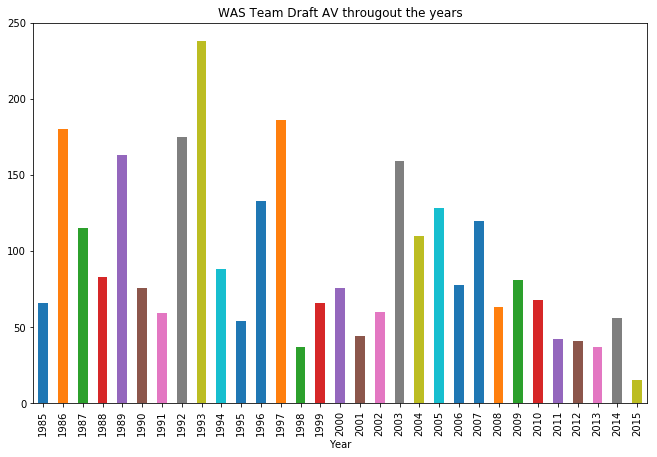

In [12]:
teams = set(df_draft['Tm'])
DrAV_Team_Year['NYG'].plot(kind='bar',figsize=(11,7),title='WAS Team Draft AV througout the years')

In [13]:
#Media da diferença entre CarAV e First4AV de todas as posições entre intervalos de carreira
zero_five_diff = (Carrer_years['0-5']['CarAV'] - Carrer_years['0-5']['First4AV']).mean()
five_ten_diff = (Carrer_years['6-10']['CarAV'] - Carrer_years['6-10']['First4AV']).mean()
ten_fifteen_diff = (Carrer_years['11-15']['CarAV'] - Carrer_years['11-15']['First4AV']).mean() 
fifteen_twenty_diff = (Carrer_years['16-20']['CarAV'] - Carrer_years['16-20']['First4AV']).mean() 

In [14]:
print('00-05 Carrer Years -- CarAV and First4AV difference: ' + str(round(zero_five_diff,2)) + ' -- ' + "Atletas: " + str(len(Carrer_years['0-5'])))
print('06-10 Carrer Years -- CarAV and First4AV difference: ' + str(round(five_ten_diff,2)) + ' -- ' + "Atletas: " + str(len(Carrer_years['6-10'])))
print('11-15 Carrer Years -- CarAV and First4AV difference: ' + str(round(ten_fifteen_diff,2)) + ' -- ' + "Atletas: " + str(len(Carrer_years['11-15'])))
print('16-20 Carrer Years -- CarAV and First4AV difference: ' + str(round(fifteen_twenty_diff,2)) + ' -- ' + "Atletas: " + str(len(Carrer_years['16-20'])))

00-05 Carrer Years -- CarAV and First4AV difference: -0.05 -- Atletas: 3876
06-10 Carrer Years -- CarAV and First4AV difference: 6.31 -- Atletas: 2415
11-15 Carrer Years -- CarAV and First4AV difference: 28.57 -- Atletas: 696
16-20 Carrer Years -- CarAV and First4AV difference: 49.05 -- Atletas: 65


In [15]:
#Para cada posição tem-se para cada intervalo de 5 anos de carreira como o AV da carreira do jogador é representado pelo AV dos seus primeiros 4 anos.
#Assim pode-se medir como jogadores de certas posições melhoram com o tempo e o quanto que esses evoluem.
for pos in positions:
    zero_five_diff_pos = (Carrer_years['0-5'][Carrer_years['0-5']['Pos'] == pos]['CarAV'] - Carrer_years['0-5'][Carrer_years['0-5']['Pos'] == pos]['First4AV']).mean()
    five_ten_diff_pos = (Carrer_years['6-10'][Carrer_years['6-10']['Pos'] == pos]['CarAV'] - Carrer_years['6-10'][Carrer_years['6-10']['Pos'] == pos]['First4AV']).mean()
    ten_fifteen_diff_pos = (Carrer_years['11-15'][Carrer_years['11-15']['Pos'] == pos]['CarAV'] - Carrer_years['11-15'][Carrer_years['11-15']['Pos'] == pos]['First4AV']).mean()
    fifteen_twenty_diff_pos = (Carrer_years['16-20'][Carrer_years['16-20']['Pos'] == pos]['CarAV'] - Carrer_years['16-20'][Carrer_years['16-20']['Pos'] == pos]['First4AV']).mean()
    print('00-05 Carrer Years -- ' + pos +  ' -- CarAV and First4AV difference (media): ' + str(round(zero_five_diff_pos,2)) + ' -- ' + "Atletas: " + str(len(Carrer_years['0-5'][Carrer_years['0-5']['Pos'] == pos]['CarAV'])))
    print('06-10 Carrer Years -- ' + pos +  ' -- CarAV and First4AV difference (media): ' + str(round(five_ten_diff_pos,2)) + ' -- ' + "Atletas: " + str(len(Carrer_years['6-10'][Carrer_years['6-10']['Pos'] == pos]['CarAV'])))
    print('11-15 Carrer Years -- ' + pos +  ' -- CarAV and First4AV difference (media): ' + str(round(ten_fifteen_diff_pos,2)) + ' -- ' + "Atletas: " + str(len(Carrer_years['11-15'][Carrer_years['11-15']['Pos'] == pos]['CarAV'])))
    print('16-20 Carrer Years -- ' + pos +  ' -- CarAV and First4AV difference (media): ' + str(round(fifteen_twenty_diff_pos,2)) + ' -- ' + "Atletas: " + str(len(Carrer_years['16-20'][Carrer_years['16-20']['Pos'] == pos]['CarAV'])))
    print('\n')

00-05 Carrer Years -- DB -- CarAV and First4AV difference (media): -0.05 -- Atletas: 727
06-10 Carrer Years -- DB -- CarAV and First4AV difference (media): 5.97 -- Atletas: 474
11-15 Carrer Years -- DB -- CarAV and First4AV difference (media): 26.95 -- Atletas: 116
16-20 Carrer Years -- DB -- CarAV and First4AV difference (media): 70.6 -- Atletas: 5


00-05 Carrer Years -- G -- CarAV and First4AV difference (media): -0.04 -- Atletas: 207
06-10 Carrer Years -- G -- CarAV and First4AV difference (media): 7.64 -- Atletas: 159
11-15 Carrer Years -- G -- CarAV and First4AV difference (media): 34.96 -- Atletas: 48
16-20 Carrer Years -- G -- CarAV and First4AV difference (media): 58.5 -- Atletas: 2


00-05 Carrer Years -- LB -- CarAV and First4AV difference (media): -0.04 -- Atletas: 520
06-10 Carrer Years -- LB -- CarAV and First4AV difference (media): 7.03 -- Atletas: 325
11-15 Carrer Years -- LB -- CarAV and First4AV difference (media): 34.68 -- Atletas: 81
16-20 Carrer Years -- LB -- CarA

In [16]:
#Para cada time temos quantos atletas de cada posição foram draftados.
Team_pos = df_draft.groupby(['Tm','Position Standard']).count()['Player_Id']

In [17]:
Team_pos

Tm   Position Standard
ARI  C                     5
     DB                   24
     DE                   20
     DT                   14
     FB                    2
     G                     9
     K                     1
     LB                   20
     QB                    9
     RB                   15
     T                     9
     TE                   13
     WR                   17
ATL  C                     3
     DB                   48
     DE                   17
     DT                   16
     FB                    2
     G                    17
     K                     1
     LB                   30
     P                     2
     QB                    9
     RB                   26
     T                    14
     TE                   10
     WR                   28
BAL  C                     4
     DB                   25
     DE                   11
                          ..
TAM  RB                   29
     T                    13
     TE             